In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_excel('Orders_Details.xlsx')
df.head()

,Unnamed: 0,Purchase Date,Titles,Category,Status,Prices
0,0,"Sat, 19th Sep","Realme 7 (Mist Blue, 64 GB)",Mobiles & Accessories,"Delivery expected between Today, Sep 24 and Oc...","₹14,999"
1,1,"Sat, 19th Sep","Realme 7 (Mist Blue, 64 GB)",Mobiles & Accessories,"Delivery expected between Today, Sep 24 and Oc...","₹14,999"
2,2,"Sat, 29th Aug","Amish's Ramachandra Series - Ram, Sita &...",Books,Delivered on Sep 10,₹369
3,3,"Sat, 29th Aug",The Richest Man In Babylon,Books,Delivered on Sep 09,₹175
4,4,"Sat, 29th Aug",HOW TO TALK TO ANYONE,Books,Delivered on Sep 09,₹184


In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Purchase Date  28 non-null     object
 1   Titles         28 non-null     object
 2   Category       26 non-null     object
 3   Status         28 non-null     object
 4   Prices         28 non-null     object
dtypes: object(5)
memory usage: 1.2+ KB


In [7]:
df.isnull().sum()
#Number of missing values. Since, the data set is very small and missing values are even smaller,
#let's directly look at the missing values

Purchase Date    0
Titles           0
Category         2
Status           0
Prices           0
dtype: int64

In [8]:
df[df['Category'].isnull()]


,Purchase Date,Titles,Category,Status,Prices
25,"Wed, 16th May",I Am Malala,NaN,"Delivered on May 20, 2018",₹203
27,"Fri, 20th Apr","The Secret Of The Nagas (English, Paperb...",NaN,"Delivered on Apr 22, 2018",₹220


In [9]:
df['Category'].value_counts()

#Since, majority of the orders are books, we assume that the missing data
#most probably belons to a book category.
#Also, this can be manually checked since the dataset is very small

Books                                11
Mobiles & Accessories                 6
Bags, Wallets & Belts                 2
Footwear                              1
Health & Personal Care Appliances     1
Computers                             1
Home Entertainment                    1
Wearable Smart Devices                1
Beauty and Grooming                   1
Audio & Video                         1
Name: Category, dtype: int64

In [10]:
df['Category'].fillna(value='Books', inplace=True)

In [11]:
df.isnull().sum()
#The missing values are dealt with.

Purchase Date    0
Titles           0
Category         0
Status           0
Prices           0
dtype: int64

In [12]:
category = df['Category'].value_counts()
category

Books                                13
Mobiles & Accessories                 6
Bags, Wallets & Belts                 2
Footwear                              1
Health & Personal Care Appliances     1
Computers                             1
Home Entertainment                    1
Wearable Smart Devices                1
Beauty and Grooming                   1
Audio & Video                         1
Name: Category, dtype: int64

Text(0.5, 0, 'Number of Orders')

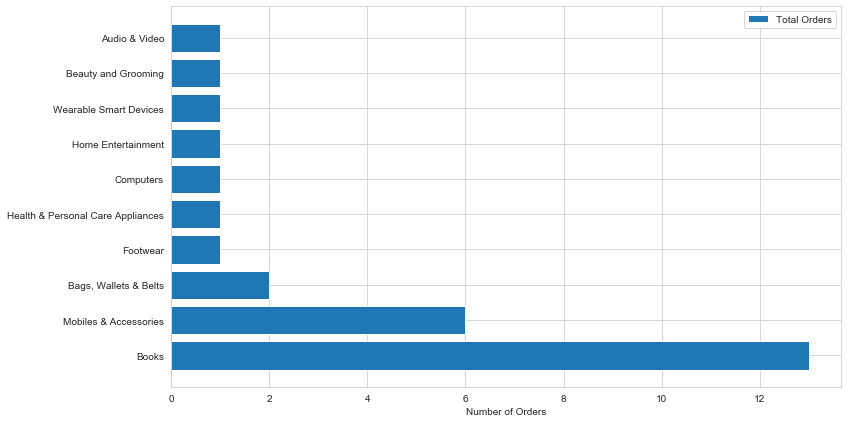

In [33]:
sns.set_style('whitegrid')
plt.figure(figsize = (12,7))
plt.barh(category.index, category.values, tick_label=category.index)
plt.legend(labels = ['Total Orders'])
plt.xlabel("Number of Orders")

In [14]:
type(df.Prices[0]) 
#The data type of Prices is string. We need to convert it. 
#Before conversion we need to clear any kind of signals


str

In [15]:
#importing Regular Expressions to clean data
import re
new = []
for price in df.Prices:
    if '+' in price:
        price = price.split('+')[0]
    new.append(re.findall('[0-9]+', price))


In [16]:
new_prices =[]
for n in new:
    p = ''
    for n_char in n:
        p+=n_char
    new_prices.append(int(p))


In [17]:
df.drop(columns='Prices', axis=1, inplace=True)

In [18]:
df['Prices'] = new_prices
df.head()

,Purchase Date,Titles,Category,Status,Prices
0,"Sat, 19th Sep","Realme 7 (Mist Blue, 64 GB)",Mobiles & Accessories,"Delivery expected between Today, Sep 24 and Oc...",14999
1,"Sat, 19th Sep","Realme 7 (Mist Blue, 64 GB)",Mobiles & Accessories,"Delivery expected between Today, Sep 24 and Oc...",14999
2,"Sat, 29th Aug","Amish's Ramachandra Series - Ram, Sita &...",Books,Delivered on Sep 10,369
3,"Sat, 29th Aug",The Richest Man In Babylon,Books,Delivered on Sep 09,175
4,"Sat, 29th Aug",HOW TO TALK TO ANYONE,Books,Delivered on Sep 09,184


In [19]:
category_expenditure = df.pivot_table(values="Prices", index="Category", aggfunc='sum')

In [20]:
category_expenditure.sort_values(by='Prices', inplace=True)

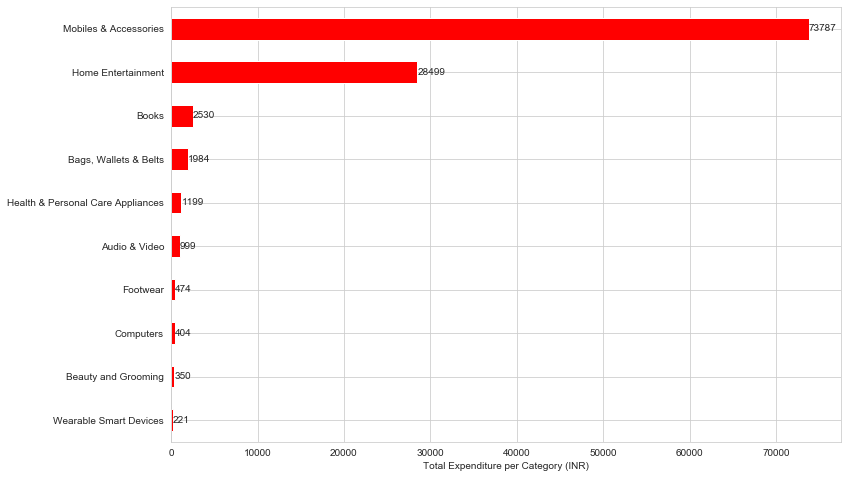

In [21]:
sns.set_style('whitegrid')
ax = category_expenditure['Prices'].plot(kind='barh', figsize=(12,8), color='red')
ax.set_xlabel("Total Expenditure per Category (INR)")
ax.set_ylabel("")
for i in ax.patches:
    ax.text(i.get_width()+0.8, i.get_y()+0.2, str(i.get_width()))

In [22]:
df['Purchase Month'] = df['Purchase Date'].apply(lambda x: x[-3:])

In [23]:
df.head()

,Purchase Date,Titles,Category,Status,Prices,Purchase Month
0,"Sat, 19th Sep","Realme 7 (Mist Blue, 64 GB)",Mobiles & Accessories,"Delivery expected between Today, Sep 24 and Oc...",14999,Sep
1,"Sat, 19th Sep","Realme 7 (Mist Blue, 64 GB)",Mobiles & Accessories,"Delivery expected between Today, Sep 24 and Oc...",14999,Sep
2,"Sat, 29th Aug","Amish's Ramachandra Series - Ram, Sita &...",Books,Delivered on Sep 10,369,Aug
3,"Sat, 29th Aug",The Richest Man In Babylon,Books,Delivered on Sep 09,175,Aug
4,"Sat, 29th Aug",HOW TO TALK TO ANYONE,Books,Delivered on Sep 09,184,Aug


In [24]:
months = {"Jan":0, "Feb":1, "Mar":2, "Apr":3, "May":4, "Jun":5, "Jul":6, "Aug":7, "Sep":8, "Oct":9, "Nov":10, "Dec":11}

In [25]:
df['Purchase Month'] = df['Purchase Month'].map(months)

In [26]:
months_exp = df.pivot_table(values='Prices', index='Purchase Month', aggfunc=sum)

In [27]:
def change(row):
    for key, value in months.items():
        if row == value:
            return key

In [28]:
months_exp.sort_values(by='Purchase Month', inplace=True)

In [29]:
months_exp.reset_index(inplace=True)

In [30]:
months_exp['Purchase Month'] = months_exp['Purchase Month'].apply(change)

In [31]:
months_exp

,Purchase Month,Prices
0,Jan,1249
1,Feb,404
2,Mar,474
3,Apr,392
4,May,43324
5,Jun,11349
6,Aug,2046
7,Sep,29998
8,Oct,19499
9,Dec,1712


Text(0, 0.5, 'Expenditure/Month')

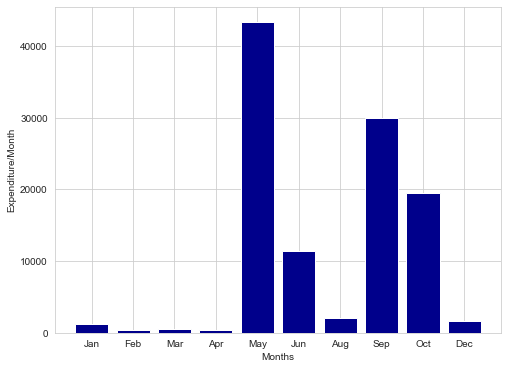

In [32]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
plt.bar( months_exp['Purchase Month'], months_exp['Prices'], color='darkblue')
plt.xlabel('Months')
plt.ylabel('Expenditure/Month')
